In [127]:
import numpy as np
import matplotlib.pyplot as plt

### We are working with equation y^ = wx+b

In [128]:
# y_hat = w*x + b
x = np.array([1.0, 2.0])   #features
y = np.array([300.0, 500.0])   #target value

In [129]:
#a function which takes an array of x and y to calculate the cost value for each of it the add it like errors

def cost_function(x,y,w,b):
    m = len(x)
    cost = 0
    for i in range(m):
        y_hat = w*x[i] + b

        cost += (y[i] - y_hat)**2                                    #COST FUNCTION
    return cost/(2*m)

### now we want the value of w and b (parameters) be such that the cost function is minimized. for this we use gradient descent

In [130]:
def calculate_gradient(x,y,w,b):
    # differentiate with respect to all the parameters
    m = len(x)
    
    dw = sum(((x*w+b) - y)*x)
    db = sum((x*w+b) - y)
    return dw/m,db/m

In [131]:
def gradient_descent(a, x,y,w,b,cost_function,calculate_gradient):
    # Initialize parameters
    i = 0 # number of iterations
    
    J_history = []
    p_history = []
    iter = []
    
    while i < 1000:
        tempw= w
        tempb= b
        dw, db = calculate_gradient(x,y,tempw,tempb)
        w -= a*(dw)
        b -= a*(db)
        i = i +1
        
        iter.append([i,cost_function(x,y,w,b)])
        J_history.append(cost_function(x,y,w,b))
        p_history.append([w,b])
    
    return w,b, J_history, p_history,iter

In [136]:
w = 0
b = 0
a = 0.1  # Learning rate
# Perform gradient descent
w, b, J_history, p_history,iter = gradient_descent(a, x, y, w, b, cost_function, calculate_gradient)

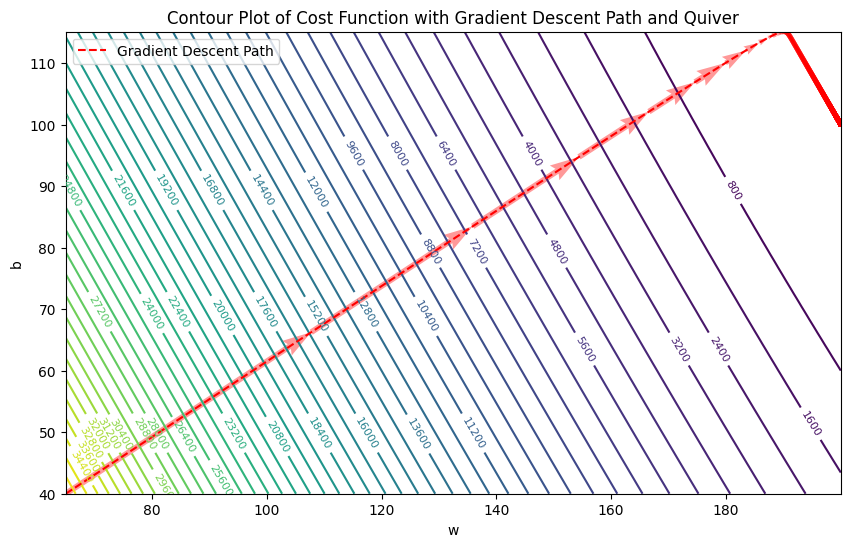

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


In [137]:
w_values = np.array([p[0] for p in p_history])
b_values = np.array([p[1] for p in p_history])

# Create a grid of w and b values
w_min, w_max = w_values.min(), w_values.max()
b_min, b_max = b_values.min(), b_values.max()

W, B = np.meshgrid(np.linspace(w_min, w_max, 100), np.linspace(b_min, b_max, 100))


# Calculate cost for each point in the grid
J_grid = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_grid[i, j] = cost_function(x, y,W[i, j], B[i, j])

# Create the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contour(W, B, J_grid, levels=60, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Plot the gradient descent path
plt.plot(w_values, b_values, 'r--', label='Gradient Descent Path')


for i in range(len(w_values) - 1):
    plt.quiver(w_values[i], b_values[i], w_values[i + 1] - w_values[i], b_values[i + 1] - b_values[i], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.4)

plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour Plot of Cost Function with Gradient Descent Path and Quiver')
plt.legend()
plt.show()

# ______________________________________
print(f"1000 sqft house prediction {w*1.0 + b:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w*1.2 + b:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w*2.0 + b:0.1f} Thousand dollars")


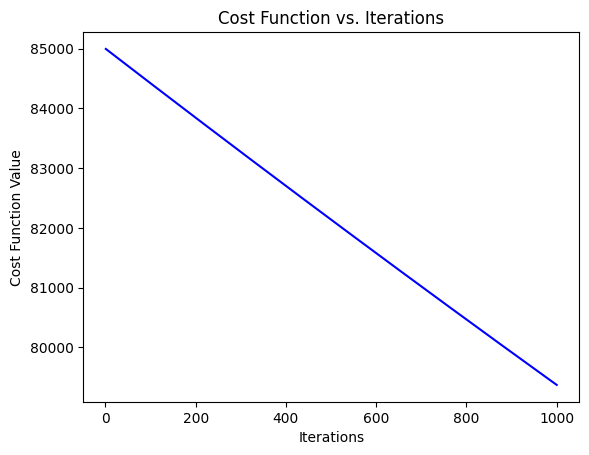

In [134]:
iterations = [i[0] for i in iter]
cost_values = [i[1] for i in iter]

# Plot cost function vs. iterations
plt.plot(iterations, cost_values, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iterations')
plt.show()